# scikit-learn中的PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

#### PCA

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [8]:
clf = KNeighborsClassifier()
%time clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

CPU times: user 1.54 ms, sys: 3.37 ms, total: 4.91 ms
Wall time: 3.92 ms


0.98888888888888893

In [6]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduce = pca.transform(X_train)
X_test_reduce = pca.transform(X_test)

In [9]:
clf = KNeighborsClassifier()
%time clf.fit(X_train_reduce, y_train)
score = clf.score(X_test_reduce, y_test)
score

CPU times: user 2.79 ms, sys: 0 ns, total: 2.79 ms
Wall time: 1.93 ms


0.60555555555555551

#### 主成分所解释的方差

In [10]:
pca.explained_variance_ratio_

array([ 0.1450646 ,  0.13714246])

In [11]:
pca.explained_variance_

array([ 175.14277141,  165.57802426])

In [12]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train, y_train)
pca.explained_variance_ratio_

array([  1.45064600e-01,   1.37142456e-01,   1.19680004e-01,
         8.43768923e-02,   5.87005941e-02,   5.01797333e-02,
         4.34065700e-02,   3.61375740e-02,   3.39661991e-02,
         3.00599249e-02,   2.38906921e-02,   2.29417581e-02,
         1.81335935e-02,   1.78403959e-02,   1.47411385e-02,
         1.41290045e-02,   1.29333094e-02,   1.25283166e-02,
         1.01123057e-02,   9.08986879e-03,   8.98365069e-03,
         7.72299807e-03,   7.62541166e-03,   7.09954951e-03,
         6.96433125e-03,   5.84665284e-03,   5.77225779e-03,
         5.07732970e-03,   4.84364707e-03,   4.34595748e-03,
         3.73352381e-03,   3.57655938e-03,   3.30727680e-03,
         3.18129431e-03,   3.06969704e-03,   2.89170006e-03,
         2.51205204e-03,   2.27743660e-03,   2.22760483e-03,
         2.00065017e-03,   1.89529684e-03,   1.56877138e-03,
         1.42740894e-03,   1.39115781e-03,   1.20896097e-03,
         1.10149976e-03,   9.81702199e-04,   8.82376601e-04,
         5.69898729e-04,

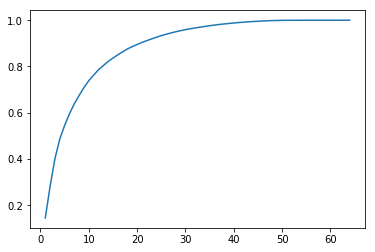

In [13]:
evr_sum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, X_train.shape[1]+1), evr_sum)
plt.show()

In [15]:
pca = PCA(0.95)
pca.fit(X_train, y_train)
pca.n_components_

28

In [16]:
X_train_reduce = pca.transform(X_train)
X_test_reduce = pca.transform(X_test)

In [17]:
clf = KNeighborsClassifier()
%time clf.fit(X_train_reduce, y_train)
clf.score(X_test_reduce, y_test)

CPU times: user 2.38 ms, sys: 218 µs, total: 2.6 ms
Wall time: 1.9 ms


0.98333333333333328

#### 使用PCA对数据进行降维可视化

In [18]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduce = pca.transform(X)

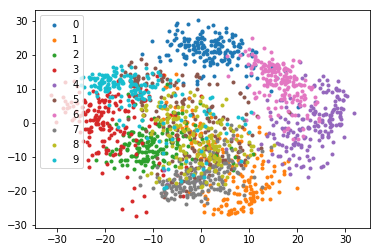

In [20]:
for k in range(0, 10):
    plt.scatter(X_reduce[y==k, 0], X_reduce[y==k, 1], label=str(k), marker=".")
plt.legend()
plt.show()